# APARTAT B

## EDA

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

dataset = pd.read_csv("./water_potability.csv").dropna()
dataset_values = dataset.values

titles = dataset.columns.values
n_clases = dataset["Potability"].nunique()


#Histogrames
for i in range(dataset.shape[1] - 1):
    sns.histplot(data=dataset, x=titles[i], hue="Potability", multiple="dodge", shrink=.8, palette='pastel')
    plt.savefig("./img/aprtB/hist/Caracteristica" + str(i+1) + ".png")
    plt.clf()
    
#Disperció
for i in range(dataset.shape[1] - 1):
    sns.scatterplot(data=dataset, x=titles[i], y=titles[-1], palette='pastel', hue="Potability")
    plt.savefig("./img/aprtB/disp/Caracteristica" + str(i+1) + ".png")
    plt.clf()

<Figure size 640x480 with 0 Axes>

# Preprocessing

In [10]:
X = dataset_values[:,:-1]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = dataset_values[:,-1]

# Model selection and Cross Validation

In [3]:
'''
You have not provided enough information. You just mentioned that you're using SVM but not which type of SVM since there are many implementations of it such as SVC, NuSVC and LinearSVC.
Those different types have different properties.
'''

from warnings import filterwarnings
filterwarnings('ignore')

particions = [0.5, 0.7, 0.8]

models = [svm.LinearSVC(), KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), Perceptron()]
name_models = ["Support Vector Machines", "KNN", "Decision Tree", "Logistic Regression" , "Perceptron"]
with open('./results/modelSelection.txt', 'w') as f:
    for i,model in enumerate(models):
        
        #Score models
        f.write("---- " + name_models[i] + " ----\n")
        f.write("Parametres per defecte: " + str(model.get_params()) + '\n\n')
        for part in particions:
            x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=part)
            model.fit(x_train, y_train)
            f.write("Score del model amb " +  str(part) + ": " + str(model.score(x_test, y_test)) + "\n")
        f.write("\n\n")
        
        #Cross validation
        for k in range(2,6):
            scores = cross_val_score(model, X, y, cv=k)
            f.write("Score mitja amb k-fold = " + str(k) + " : " + str(scores.mean())+ "\n")
        f.write("\nClasses trobades: " + str(model.classes_) + "\n")
        f.write("Atributs trobats: " + str(model.n_features_in_) + "\n\n")
        
        #Leave one out
        res = []
        for train_index, test_index in LeaveOneOut().split(X,y):
            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
            model.fit(X_train, y_train)
            res.append(model.score(X_test, y_test))
        f.write("Score Leave One Out: " + str(np.array(res).mean()) + "\n\n")
        

# HYPERPARAMETERS

In [11]:
models = [svm.LinearSVC(), KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), Perceptron()]
''' DICCIONARIO PARA LA BUSQUEDA EXHAUSTIVA DE HYPERPARAMETERS'''
svm = {'C': [0.1,1, 10, 100], 'random_state': [0,10,30,90]}
perceptron = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                    'fit_intercept': [True, False], 'shuffle': [True, False]}
knn = { 'n_neighbors' : [5,9,11,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
decisiontree = {
    'max_depth': [2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

logireg = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

name_models = ["Support Vector Machines", "KNN", "Decision Tree", "Logistic Regression" , "Perceptron"]
params = [svm, knn, decisiontree, logireg, perceptron]

with open('./results/hyperparameters.txt', 'w') as f:
    for i,model in enumerate(models):
        f.write("Model name: " + name_models[i] + "\n")
        #grid = GridSearchCV(model, params[i], verbose=3, n_jobs=-1).fit(X,y)
        grid = RandomizedSearchCV(model, params[i], verbose=3, n_jobs=-1).fit(X,y)
        f.write("Els millors parametres: " + str(grid.best_params_) + "\n")
        f.write("El millor score: " + str(grid.best_score_) + "\n\n")
    

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\poles\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\poles\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


# APARTAT A

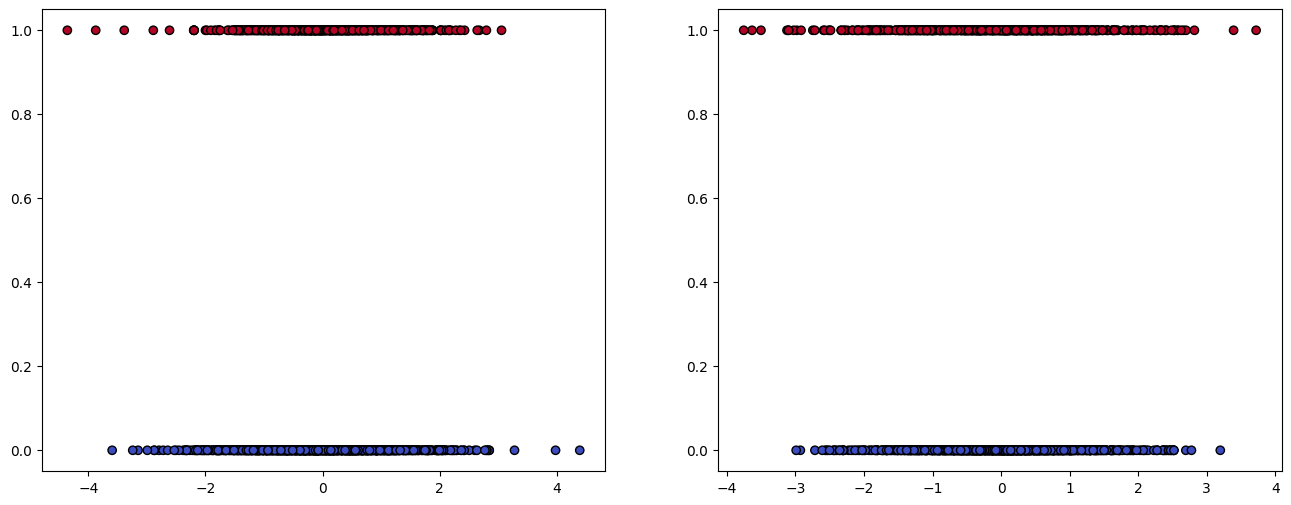

In [16]:
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

dataset = pd.read_csv("./water_potability.csv").dropna()

classes = dataset["Potability"].nunique()
dataset_values = dataset.values
titles = dataset.columns.values

df = pd.DataFrame(dataset_values, columns=titles)

X = dataset_values[:,:-1]

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
Y = dataset_values[:,-1]

fig,sub = plt.subplots(1,2, figsize=(16,6))
sub[0].scatter(X[:,0], Y,c=Y,cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], Y,c=Y,cmap=plt.cm.coolwarm, edgecolors='k')

In [17]:
def createPRCurve(probs, name):
    # Compute Precision-Recall and plot curve
    precision = {}
    recall = {}
    average_precision = {}
    plt.figure()
    for i in range(classes):
        precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
        average_precision[i] = average_precision_score(y_v == i, probs[:, i])

        plt.plot(recall[i], precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                               ''.format(i, average_precision[i]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="upper right")
        plt.savefig("./img/aprtA/pr/" + name + ".png")
        
def createROCCurve(probs, name):
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    # Plot ROC curve
    plt.figure()
    for i in range(classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.legend()
    plt.savefig("./img/aprtA/roc/" + name + ".png")

Correct classification Logistic  0.5 % of the data:  0.5914512922465208
Correct classification SVM       0.5 % of the data:  0.5864811133200796
Correct classification KNN       0.5 % of the data:  0.6113320079522863
Correct classification Decision Tree       0.5 % of the data:  0.610337972166998
Correct classification Logistic  0.7 % of the data:  0.6125827814569537
Correct classification SVM       0.7 % of the data:  0.5993377483443708
Correct classification KNN       0.7 % of the data:  0.6390728476821192
Correct classification Decision Tree       0.7 % of the data:  0.6374172185430463
Correct classification Logistic  0.8 % of the data:  0.5955334987593052
Correct classification SVM       0.8 % of the data:  0.607940446650124
Correct classification KNN       0.8 % of the data:  0.6575682382133995
Correct classification Decision Tree       0.8 % of the data:  0.6377171215880894


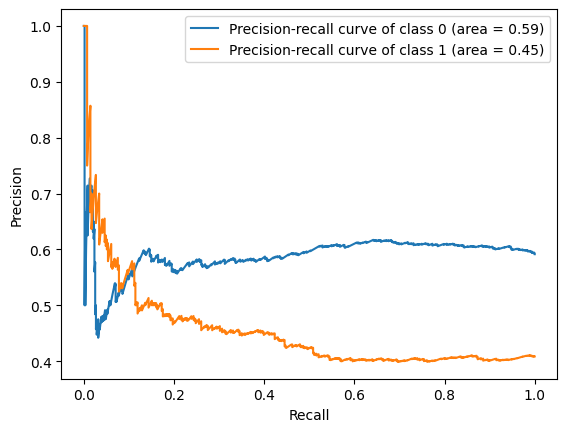

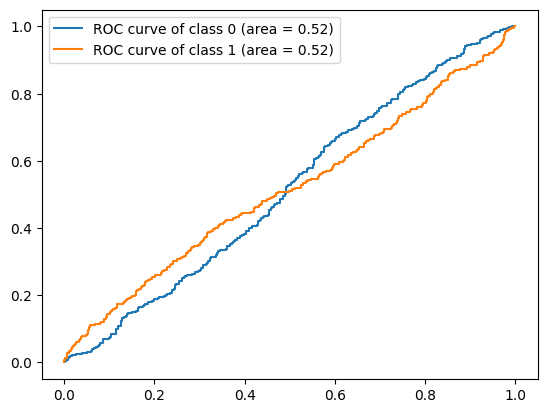

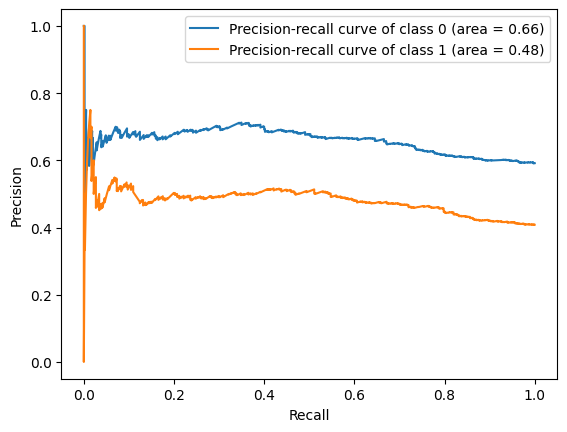

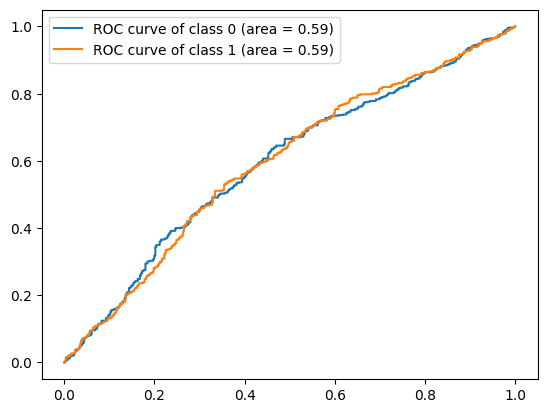

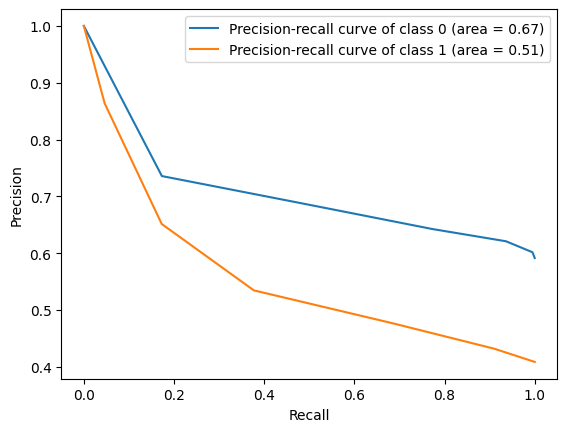

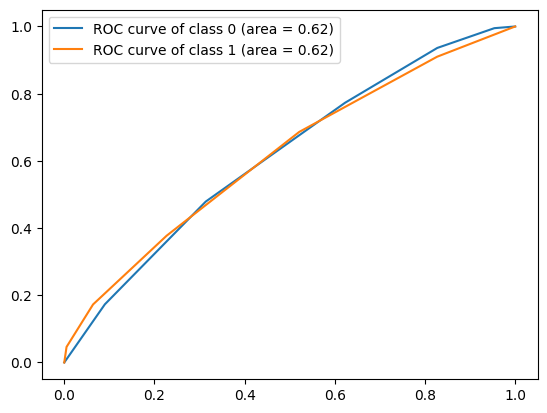

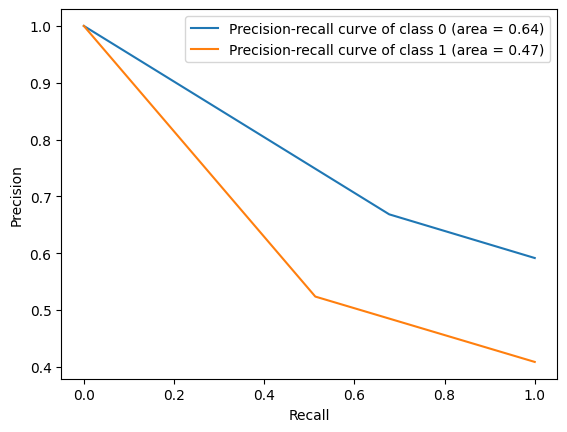

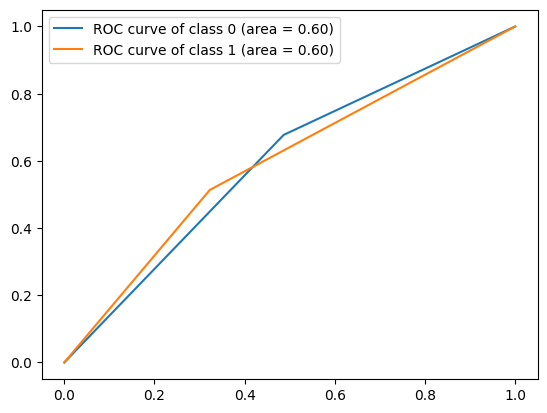

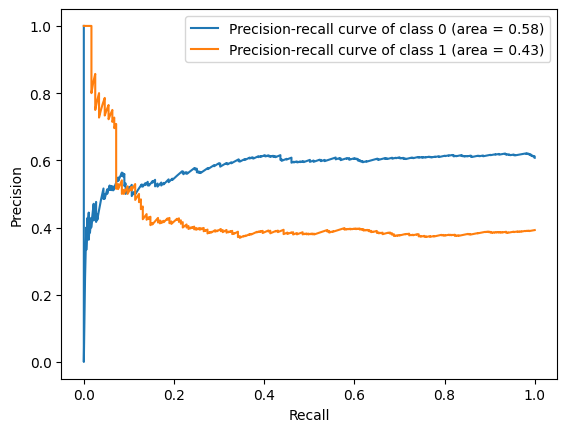

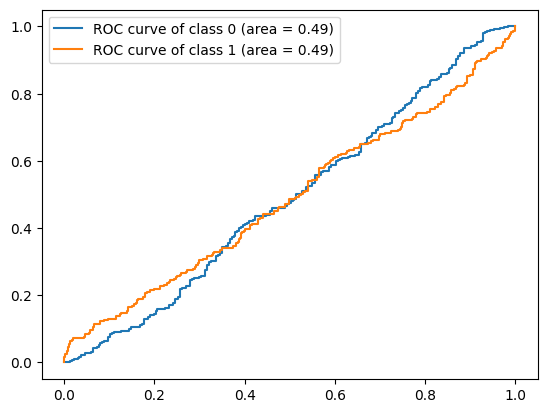

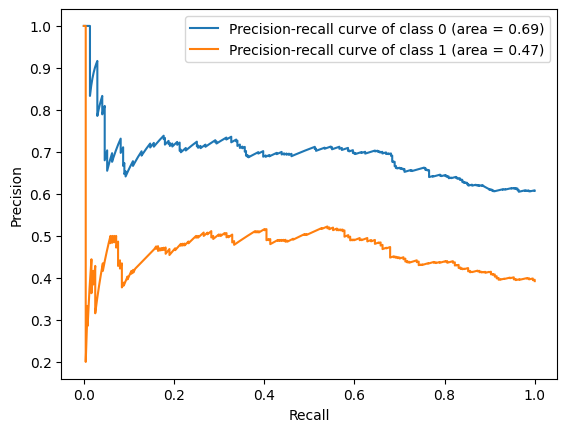

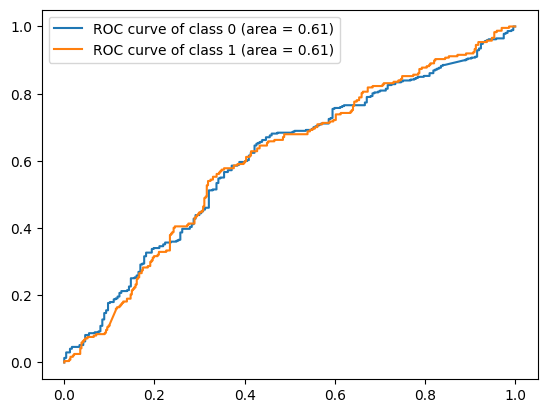

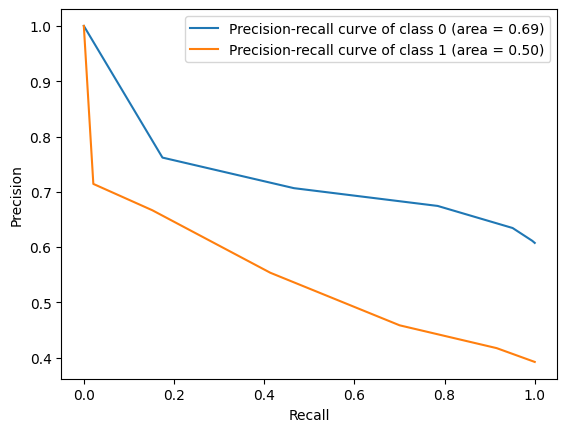

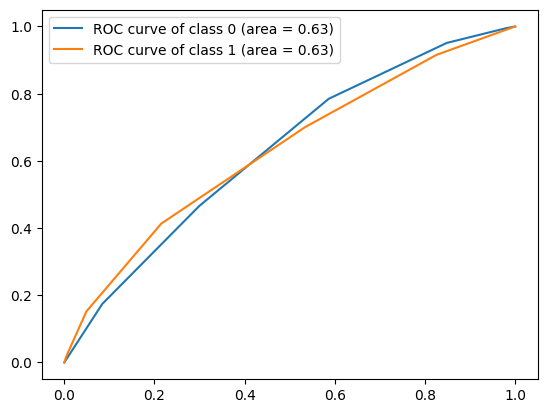

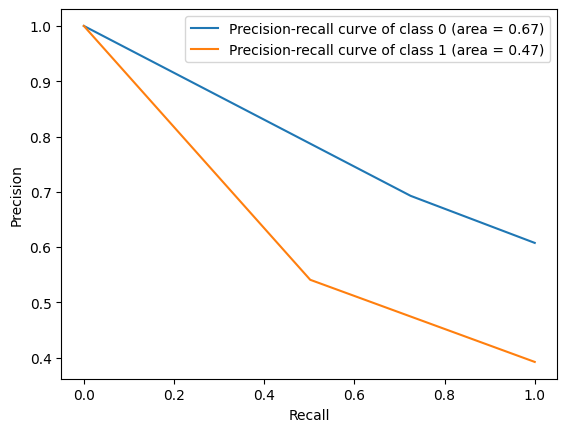

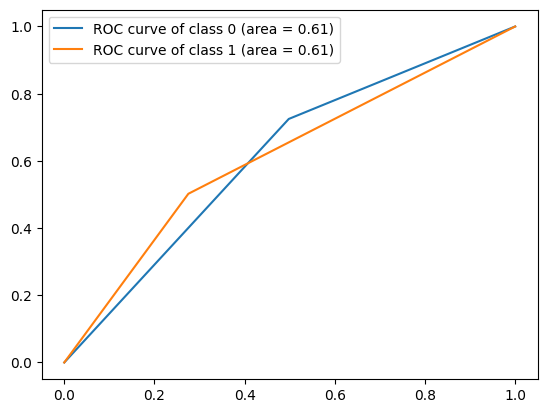

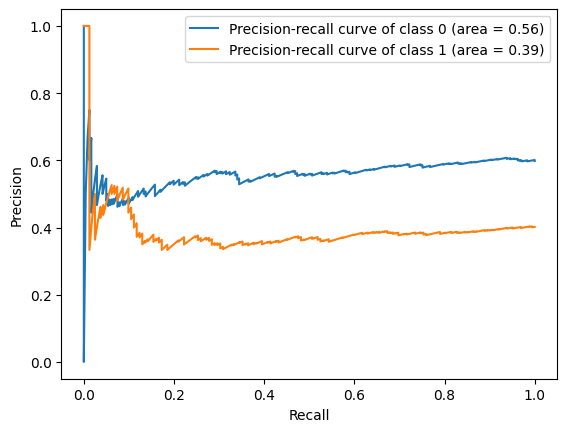

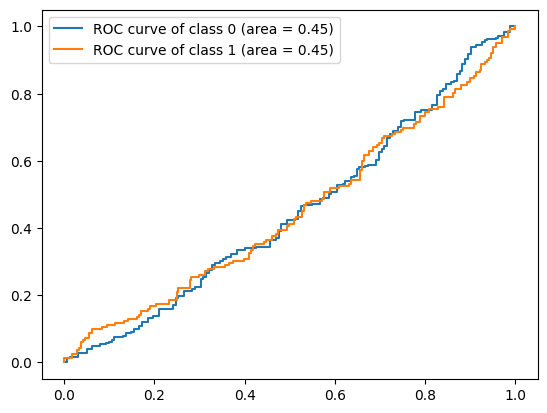

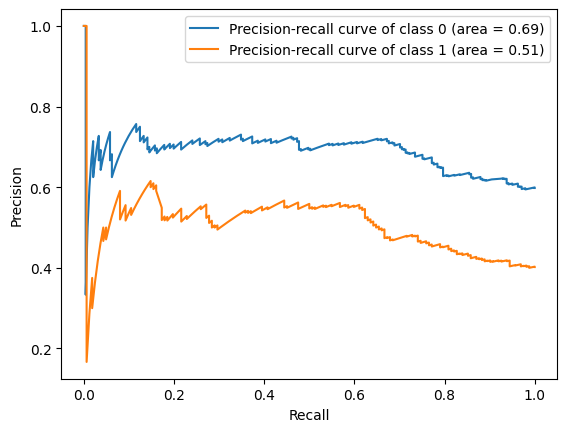

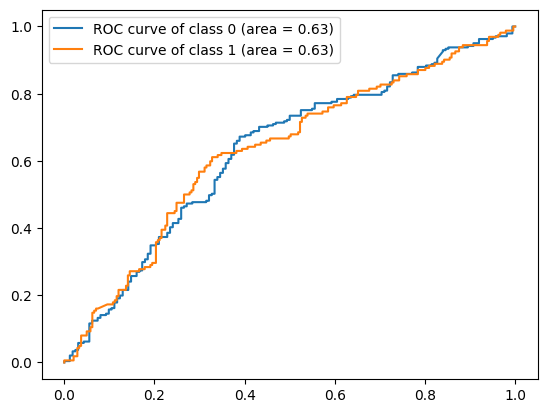

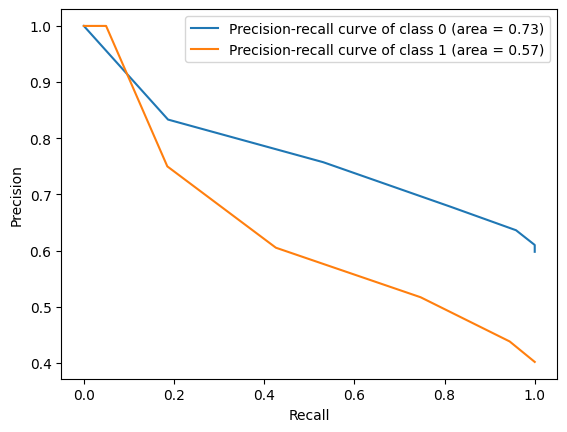

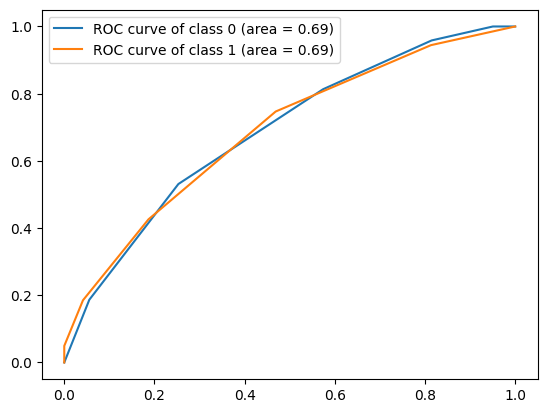

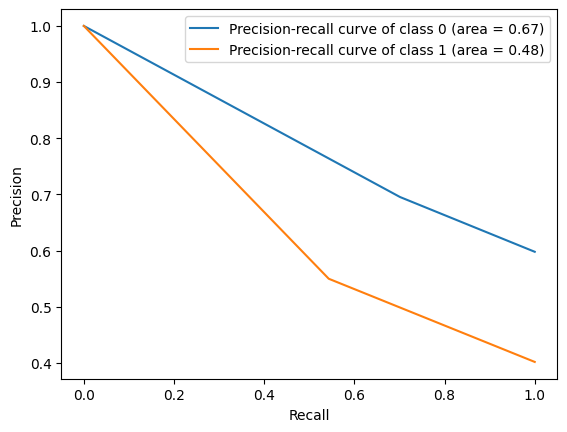

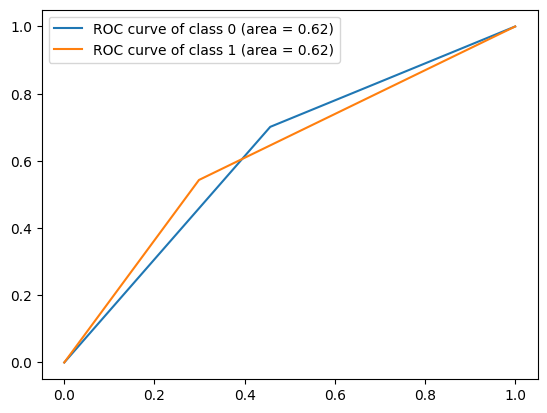

In [18]:
particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, Y, train_size=part)
    ["Perceptron"]
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)
   
    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    createPRCurve(logireg.predict_proba(x_v), "Regressor_Logístic - " + str(part))
    createROCCurve(logireg.predict_proba(x_v), "Regressor_Logístic - " + str(part))
    
    #Creem el SVM
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))
    createPRCurve(svc.predict_proba(x_v), "SVM - " + str(part))
    createROCCurve(svc.predict_proba(x_v), "SVM - " + str(part))
    
    # Creem el KNN
    knn = KNeighborsClassifier()
    
    # l'entrenem
    knn.fit(x_t, y_t)
    print ("Correct classification KNN      ", part, "% of the data: ", knn.score(x_v, y_v))
    createPRCurve(knn.predict_proba(x_v), "KNN - " + str(part))
    createROCCurve(knn.predict_proba(x_v), "KNN - " + str(part))
    
    # Creem el DecisionTree
    tree = DecisionTreeClassifier()
    
    # l'entrenem
    tree.fit(x_t, y_t)
    print ("Correct classification Decision Tree      ", part, "% of the data: ", tree.score(x_v, y_v))
    createPRCurve(tree.predict_proba(x_v), "Decision Tree - " + str(part))
    createROCCurve(tree.predict_proba(x_v), "Decision Tree - " + str(part))

In [19]:
data = dataset.values
number_of_rows = data.shape[0]
random_indices = np.random.choice(number_of_rows, size=1000, replace=False)
reduced = data[random_indices, :]

In [20]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = reduced[:, :2]
    Y = reduced[:,-1]
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, Y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()

In [ ]:
show_C_effect(C=0.1)